In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

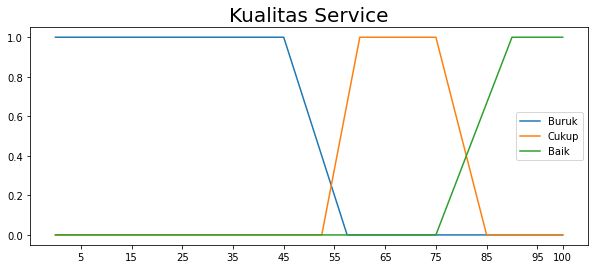

In [123]:
x1 = [0,45,57.5,100]
y1 = [1,1,0,0]

x2 = [0,52.5,60,75,85,100]
y2 = [0,0,1,1,0,0]

x3 = [0,75,90,100]
y3 = [0,0,1,1]

plt.figure(figsize=(10,4))
plt.xticks([5,15,25,35,45,55,65,75,85,95,100])
plt.title("Kualitas Service",fontsize=20) 

plt.plot(x1, y1, label='Buruk')
plt.plot(x2, y2, label='Cukup')
plt.plot(x3, y3, label='Baik')
plt.legend()

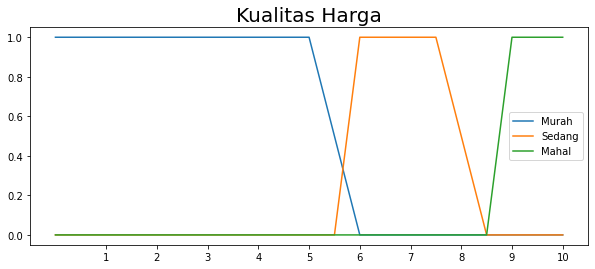

In [124]:
x1 = [0,5,6,10]
y1 = [1,1,0,0]

x2 = [0,5.5,6,7.5,8.5,10]
y2 = [0,0,1,1,0,0]

x3 = [0,8.5,9,10]
y3 = [0,0,1,1]

plt.figure(figsize=(10,4))
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.title("Kualitas Harga",fontsize=20) 

plt.plot(x1, y1, label='Murah')
plt.plot(x2, y2, label='Sedang')
plt.plot(x3, y3, label='Mahal')
plt.legend()

In [ ]:
df = pd.read_excel('bengkel.xlsx')
data = df.to_numpy().copy()
print(data)

[[  1  58   7]
 [  2  54   1]
 [  3  98   2]
 [  4  52   4]
 [  5  11   4]
 [  6  59  10]
 [  7  61   8]
 [  8  30  10]
 [  9  45   1]
 [ 10  36   9]
 [ 11  10   5]
 [ 12  38   7]
 [ 13  80   3]
 [ 14  31   8]
 [ 15  78   5]
 [ 16  82   6]
 [ 17  70   3]
 [ 18   3   9]
 [ 19  42   3]
 [ 20  49  10]
 [ 21  48   2]
 [ 22  79   9]
 [ 23  18   4]
 [ 24 100   9]
 [ 25  61  10]
 [ 26   4   2]
 [ 27  59   8]
 [ 28  44   3]
 [ 29  11   8]
 [ 30   7   6]
 [ 31  74   9]
 [ 32  42   3]
 [ 33  33   8]
 [ 34  93   4]
 [ 35   4   1]
 [ 36  32   6]
 [ 37  31   4]
 [ 38  10   1]
 [ 39  52   7]
 [ 40   7   6]
 [ 41  33   2]
 [ 42  94  10]
 [ 43  34   3]
 [ 44  63   2]
 [ 45   3   8]
 [ 46  38   1]
 [ 47  21   3]
 [ 48  64   4]
 [ 49  19   1]
 [ 50  42   5]
 [ 51  48  10]
 [ 52  94   3]
 [ 53  21   6]
 [ 54  64  10]
 [ 55  50   7]
 [ 56  49   3]
 [ 57  24   3]
 [ 58  31   1]
 [ 59  28   4]
 [ 60  79   6]
 [ 61  42   4]
 [ 62  31   7]
 [ 63  78   7]
 [ 64  35   2]
 [ 65   3   8]
 [ 66   4   9]
 [ 67  27 

In [ ]:
def service_baik(x,a=75,b=90):
    if x <= a:
        return 0
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b:
        return 1

def service_cukup(x,a=52.5,b=60,c=75,d=85):
    if x <= a:
        return 0
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b and x <= c : 
        return 1
    if x > c and x <= d : 
        return -((x-d)/(d-c)) 
    if x >= d:
        return 0

def service_buruk(x,a=45,b=57.5):
    if x <= a:
        return 1
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b:
        return 0

def harga_mahal(x,a=8.5,b=9):
    if x <= a:
        return 0
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b:
        return 1

def harga_sedang(x,a=5.5,b=6,c=7.5,d=8.5):
    if x <= a:
        return 0
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b and x <= c : 
        return 1
    if x > c and x <= d : 
        return -((x-d)/(d-c)) 
    if x >= d:
        return 0

def harga_murah(x,a=5,b=6):
    if x <= a:
        return 1
    if x > a and x < b:
        return ((x-a)/(b-a))
    if x >= b:
        return 0

In [ ]:
def fuzzification_service(service):
    service_rate = {}
    service_rate['baik'] = service_baik(service)
    service_rate['cukup'] = service_cukup(service)
    service_rate['buruk'] = service_buruk(service)
    return service_rate


def fuzzification_harga(harga):
    harga_rate = {}
    harga_rate['mahal'] = harga_mahal(harga)
    harga_rate['sedang'] = harga_sedang(harga)
    harga_rate['murah'] = harga_murah(harga)
    return harga_rate


In [ ]:
def inference(service_rate, harga_rate):
    inference_rate = {'Diterima': [],'Dipertimbangkan': [], 'Ditolak': []}

    inference_rate['Dipertimbangkan'].append(min(service_rate['baik'],harga_rate['mahal']))
    inference_rate['Diterima'].append(min(service_rate['baik'],harga_rate['sedang']))
    inference_rate['Diterima'].append(min(service_rate['baik'],harga_rate['murah']))

    inference_rate['Ditolak'].append(min(service_rate['cukup'],harga_rate['mahal']))
    inference_rate['Dipertimbangkan'].append(min(service_rate['cukup'],harga_rate['sedang']))
    inference_rate['Diterima'].append(min(service_rate['cukup'],harga_rate['murah']))

    inference_rate['Ditolak'].append(min(service_rate['buruk'],harga_rate['mahal']))
    inference_rate['Ditolak'].append(min(service_rate['buruk'],harga_rate['sedang']))
    inference_rate['Dipertimbangkan'].append(min(service_rate['buruk'],harga_rate['murah']))

    inference_rate['Diterima'] = max(inference_rate['Diterima'])
    inference_rate['Dipertimbangkan'] = max(inference_rate['Dipertimbangkan'])
    inference_rate['Ditolak'] = max(inference_rate['Ditolak'])

    return inference_rate

In [ ]:
def defuzzification_sugeno(inference_rate):
    a = inference_rate['Diterima']
    b = inference_rate['Dipertimbangkan']
    c = inference_rate['Ditolak']
    result1 = ((a*100)+(b*80)+(c*50))
    result2 = (a+b+c)
    result3 = (result1/result2)

    return result3
    

In [ ]:
data_fuz = np.pad(data,((0,0),(0,1)), mode='constant', constant_values= 0)

In [ ]:
def main(data):
    for i in range(data.shape[0]):
        quality = fuzzification_service(data[i,1])
        price = fuzzification_harga(data[i,2])

        inf_rate = inference(quality,price)

        result = defuzzification_sugeno(inf_rate)

        data[i,3] = result

    return data

In [ ]:
main(data_fuz)

array([[  1,  58,   7,  80],
       [  2,  54,   1,  84],
       [  3,  98,   2, 100],
       [  4,  52,   4,  80],
       [  5,  11,   4,  80],
       [  6,  59,  10,  50],
       [  7,  61,   8,  80],
       [  8,  30,  10,  50],
       [  9,  45,   1,  80],
       [ 10,  36,   9,  50],
       [ 11,  10,   5,  80],
       [ 12,  38,   7,  50],
       [ 13,  80,   3, 100],
       [ 14,  31,   8,  50],
       [ 15,  78,   5, 100],
       [ 16,  82,   6,  92],
       [ 17,  70,   3, 100],
       [ 18,   3,   9,  50],
       [ 19,  42,   3,  80],
       [ 20,  49,  10,  50],
       [ 21,  48,   2,  80],
       [ 22,  79,   9,  59],
       [ 23,  18,   4,  80],
       [ 24, 100,   9,  80],
       [ 25,  61,  10,  50],
       [ 26,   4,   2,  80],
       [ 27,  59,   8,  80],
       [ 28,  44,   3,  80],
       [ 29,  11,   8,  50],
       [ 30,   7,   6,  50],
       [ 31,  74,   9,  50],
       [ 32,  42,   3,  80],
       [ 33,  33,   8,  50],
       [ 34,  93,   4, 100],
       [ 35,  

In [ ]:
def getbest(data):
  choosenone = []
  for i in range(10):
    choosenone.append(data[np.argmax(data, axis=0)[3]])
    data = np.delete(data,np.argmax(data, axis=0)[3],0)

  return np.array(choosenone)

In [ ]:
thechoosenone = getbest(data_fuz)
print(thechoosenone)

[[  3  98   2 100]
 [ 13  80   3 100]
 [ 15  78   5 100]
 [ 17  70   3 100]
 [ 34  93   4 100]
 [ 44  63   2 100]
 [ 48  64   4 100]
 [ 52  94   3 100]
 [ 68  59   5 100]
 [ 75  61   1 100]]


In [ ]:
df = pd.DataFrame(np.hsplit(thechoosenone,4)[3], columns=['rate'])
print(df)

filepath = 'new_rate_bengkel.xls'

df.to_excel(filepath, index=False)

   rate
0   100
1   100
2   100
3   100
4   100
5   100
6   100
7   100
8   100
9   100


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  


In [125]:
data_frame = pd.DataFrame().from_records(thechoosenone)
data_frame.columns = ['id', 'service', 'price', 'rate']
data_frame.to_excel("peringkat.xlsx")
print(data_frame)

   id  service  price  rate
0   3       98      2   100
1  13       80      3   100
2  15       78      5   100
3  17       70      3   100
4  34       93      4   100
5  44       63      2   100
6  48       64      4   100
7  52       94      3   100
8  68       59      5   100
9  75       61      1   100
